<a href="https://colab.research.google.com/github/MasahitoKatsuki/RabbitChallenge/blob/main/handson3_1_simple_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 準備

## Googleドライブのマウント

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## sys.pathの設定

以下では，Googleドライブのマイドライブ直下にDNN_codeフォルダを置くことを仮定しています．必要に応じて，パスを変更してください．

In [2]:
import sys
sys.path.append('/content/drive/My Drive/DNN_code')

# simple RNN
### バイナリ加算

iters:0
Loss:1.711100994700102
Pred:[0 0 0 0 0 0 0 1]
True:[1 0 1 1 0 1 1 1]
110 + 73 = 1
------------
iters:100
Loss:1.0276969171641575
Pred:[0 0 0 0 1 1 0 0]
True:[0 1 0 0 1 0 1 1]
37 + 38 = 12
------------
iters:200
Loss:1.119677865080079
Pred:[0 0 0 0 0 1 1 1]
True:[0 1 1 1 0 0 1 0]
47 + 67 = 7
------------
iters:300
Loss:0.9166768611257987
Pred:[0 0 0 1 0 0 0 0]
True:[0 0 1 0 0 1 1 1]
8 + 31 = 16
------------
iters:400
Loss:0.8417817098851526
Pred:[1 1 1 1 1 1 1 1]
True:[0 1 1 1 0 1 1 1]
75 + 44 = 255
------------
iters:500
Loss:0.8754179158092896
Pred:[1 1 0 1 1 1 0 1]
True:[0 1 1 1 1 1 0 1]
91 + 34 = 221
------------
iters:600
Loss:0.8695349428891077
Pred:[1 1 1 1 0 1 1 1]
True:[1 0 1 1 1 1 1 1]
86 + 105 = 247
------------
iters:700
Loss:0.9271650582201854
Pred:[1 0 0 0 0 1 1 0]
True:[1 1 0 1 0 0 1 0]
103 + 107 = 134
------------
iters:800
Loss:1.0369139583048517
Pred:[0 0 0 0 0 0 0 0]
True:[0 0 1 0 1 1 0 1]
8 + 37 = 0
------------
iters:900
Loss:1.0093217788908797
Pred:[1 1 1 1

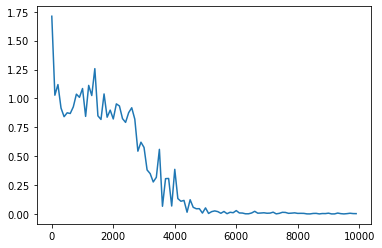

In [4]:
import numpy as np
from common import functions
import matplotlib.pyplot as plt

# def d_tanh(x):



# データを用意
# 2進数の桁数
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)
# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)],dtype=np.uint8).T,axis=1)

input_layer_size = 2
hidden_layer_size = 16
output_layer_size = 1

weight_init_std = 1
learning_rate = 0.1

iters_num = 10000
plot_interval = 100

# ウェイト初期化 (バイアスは簡単のため省略)
W_in = weight_init_std * np.random.randn(input_layer_size, hidden_layer_size)
W_out = weight_init_std * np.random.randn(hidden_layer_size, output_layer_size)
W = weight_init_std * np.random.randn(hidden_layer_size, hidden_layer_size)

# Xavier


# He



# 勾配
W_in_grad = np.zeros_like(W_in)
W_out_grad = np.zeros_like(W_out)
W_grad = np.zeros_like(W)

u = np.zeros((hidden_layer_size, binary_dim + 1))
z = np.zeros((hidden_layer_size, binary_dim + 1))
y = np.zeros((output_layer_size, binary_dim))

delta_out = np.zeros((output_layer_size, binary_dim))
delta = np.zeros((hidden_layer_size, binary_dim + 1))

all_losses = []

for i in range(iters_num):
    
    # A, B初期化 (a + b = d)
    a_int = np.random.randint(largest_number/2)
    a_bin = binary[a_int] # binary encoding
    b_int = np.random.randint(largest_number/2)
    b_bin = binary[b_int] # binary encoding
    
    # 正解データ
    d_int = a_int + b_int
    d_bin = binary[d_int]
    
    # 出力バイナリ
    out_bin = np.zeros_like(d_bin)
    
    # 時系列全体の誤差
    all_loss = 0    
    
    # 時系列ループ
    for t in range(binary_dim):
        # 入力値
        X = np.array([a_bin[ - t - 1], b_bin[ - t - 1]]).reshape(1, -1)
        # 時刻tにおける正解データ
        dd = np.array([d_bin[binary_dim - t - 1]])
        
        u[:,t+1] = np.dot(X, W_in) + np.dot(z[:,t].reshape(1, -1), W)
        z[:,t+1] = functions.sigmoid(u[:,t+1])

        y[:,t] = functions.sigmoid(np.dot(z[:,t+1].reshape(1, -1), W_out))


        #誤差
        loss = functions.mean_squared_error(dd, y[:,t])
        
        delta_out[:,t] = functions.d_mean_squared_error(dd, y[:,t]) * functions.d_sigmoid(y[:,t])        
        
        all_loss += loss

        out_bin[binary_dim - t - 1] = np.round(y[:,t])
    
    
    for t in range(binary_dim)[::-1]:
        X = np.array([a_bin[-t-1],b_bin[-t-1]]).reshape(1, -1)        

        delta[:,t] = (np.dot(delta[:,t+1].T, W.T) + np.dot(delta_out[:,t].T, W_out.T)) * functions.d_sigmoid(u[:,t+1])

        # 勾配更新
        W_out_grad += np.dot(z[:,t+1].reshape(-1,1), delta_out[:,t].reshape(-1,1))
        W_grad += np.dot(z[:,t].reshape(-1,1), delta[:,t].reshape(1,-1))
        W_in_grad += np.dot(X.T, delta[:,t].reshape(1,-1))
    
    # 勾配適用
    W_in -= learning_rate * W_in_grad
    W_out -= learning_rate * W_out_grad
    W -= learning_rate * W_grad
    
    W_in_grad *= 0
    W_out_grad *= 0
    W_grad *= 0
    

    if(i % plot_interval == 0):
        all_losses.append(all_loss)        
        print("iters:" + str(i))
        print("Loss:" + str(all_loss))
        print("Pred:" + str(out_bin))
        print("True:" + str(d_bin))
        out_int = 0
        for index,x in enumerate(reversed(out_bin)):
            out_int += x * pow(2, index)
        print(str(a_int) + " + " + str(b_int) + " = " + str(out_int))
        print("------------")

lists = range(0, iters_num, plot_interval)
plt.plot(lists, all_losses, label="loss")
plt.show()

4000回くらいでほぼ精度は達成されている。

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## [try] weight_init_stdやlearning_rate, hidden_layer_sizeを変更してみよう


## [try] 重みの初期化方法を変更してみよう
Xavier, He

## [try] 中間層の活性化関数を変更してみよう
ReLU(勾配爆発を確認しよう)<br>
tanh(numpyにtanhが用意されている。導関数をd_tanhとして作成しよう)

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#重みの初期化をHeにしてみる

iters:0
Loss:1.0950864529235749
Pred:[1 1 1 1 1 1 1 1]
True:[0 1 1 1 1 0 0 1]
16 + 105 = 255
------------
iters:100
Loss:0.9058363583470724
Pred:[0 0 0 0 0 0 0 0]
True:[1 1 0 0 0 0 1 0]
77 + 117 = 0
------------
iters:200
Loss:0.9604544911204514
Pred:[1 1 0 1 1 1 1 1]
True:[0 1 0 1 1 1 0 1]
60 + 33 = 223
------------
iters:300
Loss:1.0398273635302882
Pred:[0 0 0 0 0 0 0 1]
True:[1 0 0 0 1 1 0 0]
45 + 95 = 1
------------
iters:400
Loss:1.0454404980461645
Pred:[1 1 1 1 1 1 1 1]
True:[0 1 0 1 0 1 1 0]
43 + 43 = 255
------------
iters:500
Loss:0.9901901375204372
Pred:[0 0 0 0 0 0 0 1]
True:[0 0 1 0 0 1 1 1]
39 + 0 = 1
------------
iters:600
Loss:0.9476139425520116
Pred:[0 1 1 0 0 1 0 0]
True:[0 1 0 0 0 0 0 0]
37 + 27 = 100
------------
iters:700
Loss:0.9643536667083472
Pred:[0 0 0 0 0 0 0 0]
True:[1 0 0 0 0 1 0 1]
76 + 57 = 0
------------
iters:800
Loss:0.9756138547885322
Pred:[1 1 0 1 1 1 1 1]
True:[0 1 1 1 1 0 0 1]
12 + 109 = 223
------------
iters:900
Loss:0.9170430773583333
Pred:[0 0 1

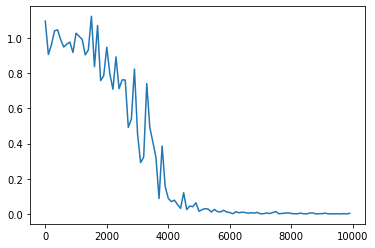

In [13]:
import numpy as np
from common import functions
import matplotlib.pyplot as plt

# def d_tanh(x):



# データを用意
# 2進数の桁数
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)
# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)],dtype=np.uint8).T,axis=1)

input_layer_size = 2
hidden_layer_size = 16
output_layer_size = 1

weight_init_std = 1
learning_rate = 0.1

iters_num = 10000
plot_interval = 100

# ウェイト初期化 (バイアスは簡単のため省略)
W_in = weight_init_std * np.random.randn(input_layer_size, hidden_layer_size)
W_out = weight_init_std * np.random.randn(hidden_layer_size, output_layer_size)
W = weight_init_std * np.random.randn(hidden_layer_size, hidden_layer_size)

# Xavier


# He
W_in = np.random.randn(input_layer_size, hidden_layer_size) / np.sqrt(input_layer_size) * np.sqrt(2)
W_out = np.random.randn(hidden_layer_size, output_layer_size) / np.sqrt(hidden_layer_size) * np.sqrt(2)
W = np.random.randn(hidden_layer_size, hidden_layer_size) / np.sqrt(hidden_layer_size) * np.sqrt(2)



# 勾配
W_in_grad = np.zeros_like(W_in)
W_out_grad = np.zeros_like(W_out)
W_grad = np.zeros_like(W)

u = np.zeros((hidden_layer_size, binary_dim + 1))
z = np.zeros((hidden_layer_size, binary_dim + 1))
y = np.zeros((output_layer_size, binary_dim))

delta_out = np.zeros((output_layer_size, binary_dim))
delta = np.zeros((hidden_layer_size, binary_dim + 1))

all_losses = []

for i in range(iters_num):
    
    # A, B初期化 (a + b = d)
    a_int = np.random.randint(largest_number/2)
    a_bin = binary[a_int] # binary encoding
    b_int = np.random.randint(largest_number/2)
    b_bin = binary[b_int] # binary encoding
    
    # 正解データ
    d_int = a_int + b_int
    d_bin = binary[d_int]
    
    # 出力バイナリ
    out_bin = np.zeros_like(d_bin)
    
    # 時系列全体の誤差
    all_loss = 0    
    
    # 時系列ループ
    for t in range(binary_dim):
        # 入力値
        X = np.array([a_bin[ - t - 1], b_bin[ - t - 1]]).reshape(1, -1)
        # 時刻tにおける正解データ
        dd = np.array([d_bin[binary_dim - t - 1]])
        
        u[:,t+1] = np.dot(X, W_in) + np.dot(z[:,t].reshape(1, -1), W)
        z[:,t+1] = functions.sigmoid(u[:,t+1])

        y[:,t] = functions.sigmoid(np.dot(z[:,t+1].reshape(1, -1), W_out))


        #誤差
        loss = functions.mean_squared_error(dd, y[:,t])
        
        delta_out[:,t] = functions.d_mean_squared_error(dd, y[:,t]) * functions.d_sigmoid(y[:,t])        
        
        all_loss += loss

        out_bin[binary_dim - t - 1] = np.round(y[:,t])
    
    
    for t in range(binary_dim)[::-1]:
        X = np.array([a_bin[-t-1],b_bin[-t-1]]).reshape(1, -1)        

        delta[:,t] = (np.dot(delta[:,t+1].T, W.T) + np.dot(delta_out[:,t].T, W_out.T)) * functions.d_sigmoid(u[:,t+1])

        # 勾配更新
        W_out_grad += np.dot(z[:,t+1].reshape(-1,1), delta_out[:,t].reshape(-1,1))
        W_grad += np.dot(z[:,t].reshape(-1,1), delta[:,t].reshape(1,-1))
        W_in_grad += np.dot(X.T, delta[:,t].reshape(1,-1))
    
    # 勾配適用
    W_in -= learning_rate * W_in_grad
    W_out -= learning_rate * W_out_grad
    W -= learning_rate * W_grad
    
    W_in_grad *= 0
    W_out_grad *= 0
    W_grad *= 0
    

    if(i % plot_interval == 0):
        all_losses.append(all_loss)        
        print("iters:" + str(i))
        print("Loss:" + str(all_loss))
        print("Pred:" + str(out_bin))
        print("True:" + str(d_bin))
        out_int = 0
        for index,x in enumerate(reversed(out_bin)):
            out_int += x * pow(2, index)
        print(str(a_int) + " + " + str(b_int) + " = " + str(out_int))
        print("------------")

lists = range(0, iters_num, plot_interval)
plt.plot(lists, all_losses, label="loss")
plt.show()

ちょっとゆっくり。

iters:0
Loss:1.5793331473591252
Pred:[1 1 1 1 1 0 1 0]
True:[1 0 0 0 0 1 1 1]
120 + 15 = 250
------------
iters:100
Loss:1.0842199667010266
Pred:[1 0 1 0 0 0 1 1]
True:[1 1 0 0 0 1 1 1]
107 + 92 = 163
------------
iters:200
Loss:0.9974492867198046
Pred:[1 1 0 1 1 0 0 1]
True:[0 1 1 1 0 0 0 0]
74 + 38 = 217
------------
iters:300
Loss:0.9318828950898397
Pred:[1 0 1 0 1 0 1 1]
True:[1 0 0 1 1 0 1 0]
74 + 80 = 171
------------
iters:400
Loss:1.1211299879824712
Pred:[1 0 0 1 0 1 1 1]
True:[1 1 1 0 1 0 0 0]
112 + 120 = 151
------------
iters:500
Loss:1.1338195063976486
Pred:[1 0 0 1 0 1 0 1]
True:[1 0 1 0 1 0 0 1]
63 + 106 = 149
------------
iters:600
Loss:0.9615269699822284
Pred:[1 0 1 1 0 0 0 1]
True:[0 1 1 1 0 0 0 0]
34 + 78 = 177
------------
iters:700
Loss:0.9804486737406455
Pred:[1 0 1 0 1 0 0 1]
True:[1 0 0 0 1 1 1 1]
57 + 86 = 169
------------
iters:800
Loss:0.9000327249981628
Pred:[1 0 1 0 1 1 1 0]
True:[0 1 1 1 1 1 1 0]
43 + 83 = 174
------------
iters:900
Loss:1.0234878081382734


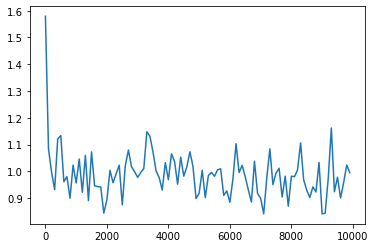

In [5]:
#[try] weight_init_stdやlearning_rate, hidden_layer_sizeを変更してみよう
#lrを0.1から0.01にしてゆっくりにしてみる。
import numpy as np
from common import functions
import matplotlib.pyplot as plt

# def d_tanh(x):



# データを用意
# 2進数の桁数
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)
# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)],dtype=np.uint8).T,axis=1)

input_layer_size = 2
hidden_layer_size = 16
output_layer_size = 1

weight_init_std = 1
learning_rate = 0.01

iters_num = 10000
plot_interval = 100

# ウェイト初期化 (バイアスは簡単のため省略)
W_in = weight_init_std * np.random.randn(input_layer_size, hidden_layer_size)
W_out = weight_init_std * np.random.randn(hidden_layer_size, output_layer_size)
W = weight_init_std * np.random.randn(hidden_layer_size, hidden_layer_size)

# Xavier


# He



# 勾配
W_in_grad = np.zeros_like(W_in)
W_out_grad = np.zeros_like(W_out)
W_grad = np.zeros_like(W)

u = np.zeros((hidden_layer_size, binary_dim + 1))
z = np.zeros((hidden_layer_size, binary_dim + 1))
y = np.zeros((output_layer_size, binary_dim))

delta_out = np.zeros((output_layer_size, binary_dim))
delta = np.zeros((hidden_layer_size, binary_dim + 1))

all_losses = []

for i in range(iters_num):
    
    # A, B初期化 (a + b = d)
    a_int = np.random.randint(largest_number/2)
    a_bin = binary[a_int] # binary encoding
    b_int = np.random.randint(largest_number/2)
    b_bin = binary[b_int] # binary encoding
    
    # 正解データ
    d_int = a_int + b_int
    d_bin = binary[d_int]
    
    # 出力バイナリ
    out_bin = np.zeros_like(d_bin)
    
    # 時系列全体の誤差
    all_loss = 0    
    
    # 時系列ループ
    for t in range(binary_dim):
        # 入力値
        X = np.array([a_bin[ - t - 1], b_bin[ - t - 1]]).reshape(1, -1)
        # 時刻tにおける正解データ
        dd = np.array([d_bin[binary_dim - t - 1]])
        
        u[:,t+1] = np.dot(X, W_in) + np.dot(z[:,t].reshape(1, -1), W)
        z[:,t+1] = functions.sigmoid(u[:,t+1])

        y[:,t] = functions.sigmoid(np.dot(z[:,t+1].reshape(1, -1), W_out))


        #誤差
        loss = functions.mean_squared_error(dd, y[:,t])
        
        delta_out[:,t] = functions.d_mean_squared_error(dd, y[:,t]) * functions.d_sigmoid(y[:,t])        
        
        all_loss += loss

        out_bin[binary_dim - t - 1] = np.round(y[:,t])
    
    
    for t in range(binary_dim)[::-1]:
        X = np.array([a_bin[-t-1],b_bin[-t-1]]).reshape(1, -1)        

        delta[:,t] = (np.dot(delta[:,t+1].T, W.T) + np.dot(delta_out[:,t].T, W_out.T)) * functions.d_sigmoid(u[:,t+1])

        # 勾配更新
        W_out_grad += np.dot(z[:,t+1].reshape(-1,1), delta_out[:,t].reshape(-1,1))
        W_grad += np.dot(z[:,t].reshape(-1,1), delta[:,t].reshape(1,-1))
        W_in_grad += np.dot(X.T, delta[:,t].reshape(1,-1))
    
    # 勾配適用
    W_in -= learning_rate * W_in_grad
    W_out -= learning_rate * W_out_grad
    W -= learning_rate * W_grad
    
    W_in_grad *= 0
    W_out_grad *= 0
    W_grad *= 0
    

    if(i % plot_interval == 0):
        all_losses.append(all_loss)        
        print("iters:" + str(i))
        print("Loss:" + str(all_loss))
        print("Pred:" + str(out_bin))
        print("True:" + str(d_bin))
        out_int = 0
        for index,x in enumerate(reversed(out_bin)):
            out_int += x * pow(2, index)
        print(str(a_int) + " + " + str(b_int) + " = " + str(out_int))
        print("------------")

lists = range(0, iters_num, plot_interval)
plt.plot(lists, all_losses, label="loss")
plt.show()

lrを0.1から0.01にするとなかなか収束しない。

iters:0
Loss:2.4951161139119065
Pred:[1 1 1 1 1 1 1 1]
True:[1 0 1 0 0 0 0 1]
50 + 111 = 255
------------
iters:100
Loss:0.9271615521698214
Pred:[1 0 1 0 1 1 1 1]
True:[1 0 0 0 1 0 0 1]
113 + 24 = 175
------------
iters:200
Loss:0.9396891139071013
Pred:[1 1 1 1 1 1 1 1]
True:[1 1 0 0 1 1 1 0]
115 + 91 = 255
------------
iters:300
Loss:1.05645308901339
Pred:[0 0 0 0 1 0 1 1]
True:[0 0 1 0 0 1 1 1]
3 + 36 = 11
------------
iters:400
Loss:1.1272839459404587
Pred:[0 0 1 1 0 1 0 1]
True:[1 0 0 1 1 0 0 0]
78 + 74 = 53
------------
iters:500
Loss:0.9788179830523911
Pred:[1 1 1 1 1 1 1 1]
True:[1 1 0 1 0 0 1 1]
123 + 88 = 255
------------
iters:600
Loss:1.1893846509490948
Pred:[0 0 0 0 0 0 0 0]
True:[0 1 1 1 0 0 1 0]
16 + 98 = 0
------------
iters:700
Loss:1.140457640342532
Pred:[1 1 1 1 1 1 1 1]
True:[0 0 1 1 0 1 1 0]
21 + 33 = 255
------------
iters:800
Loss:0.7493929356887741
Pred:[1 1 1 1 1 1 1 1]
True:[1 0 1 1 1 1 0 1]
76 + 113 = 255
------------
iters:900
Loss:0.9902497261690628
Pred:[1 

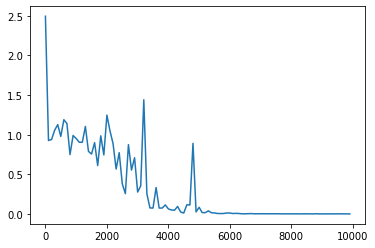

In [6]:
#[try] weight_init_stdやlearning_rate, hidden_layer_sizeを変更してみよう
#lrを0.1のまま
#hidden layerを32そうに増やしてみる

import numpy as np
from common import functions
import matplotlib.pyplot as plt

# def d_tanh(x):



# データを用意
# 2進数の桁数
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)
# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)],dtype=np.uint8).T,axis=1)

input_layer_size = 2
hidden_layer_size = 32
output_layer_size = 1

weight_init_std = 1
learning_rate = 0.1

iters_num = 10000
plot_interval = 100

# ウェイト初期化 (バイアスは簡単のため省略)
W_in = weight_init_std * np.random.randn(input_layer_size, hidden_layer_size)
W_out = weight_init_std * np.random.randn(hidden_layer_size, output_layer_size)
W = weight_init_std * np.random.randn(hidden_layer_size, hidden_layer_size)

# Xavier


# He



# 勾配
W_in_grad = np.zeros_like(W_in)
W_out_grad = np.zeros_like(W_out)
W_grad = np.zeros_like(W)

u = np.zeros((hidden_layer_size, binary_dim + 1))
z = np.zeros((hidden_layer_size, binary_dim + 1))
y = np.zeros((output_layer_size, binary_dim))

delta_out = np.zeros((output_layer_size, binary_dim))
delta = np.zeros((hidden_layer_size, binary_dim + 1))

all_losses = []

for i in range(iters_num):
    
    # A, B初期化 (a + b = d)
    a_int = np.random.randint(largest_number/2)
    a_bin = binary[a_int] # binary encoding
    b_int = np.random.randint(largest_number/2)
    b_bin = binary[b_int] # binary encoding
    
    # 正解データ
    d_int = a_int + b_int
    d_bin = binary[d_int]
    
    # 出力バイナリ
    out_bin = np.zeros_like(d_bin)
    
    # 時系列全体の誤差
    all_loss = 0    
    
    # 時系列ループ
    for t in range(binary_dim):
        # 入力値
        X = np.array([a_bin[ - t - 1], b_bin[ - t - 1]]).reshape(1, -1)
        # 時刻tにおける正解データ
        dd = np.array([d_bin[binary_dim - t - 1]])
        
        u[:,t+1] = np.dot(X, W_in) + np.dot(z[:,t].reshape(1, -1), W)
        z[:,t+1] = functions.sigmoid(u[:,t+1])

        y[:,t] = functions.sigmoid(np.dot(z[:,t+1].reshape(1, -1), W_out))


        #誤差
        loss = functions.mean_squared_error(dd, y[:,t])
        
        delta_out[:,t] = functions.d_mean_squared_error(dd, y[:,t]) * functions.d_sigmoid(y[:,t])        
        
        all_loss += loss

        out_bin[binary_dim - t - 1] = np.round(y[:,t])
    
    
    for t in range(binary_dim)[::-1]:
        X = np.array([a_bin[-t-1],b_bin[-t-1]]).reshape(1, -1)        

        delta[:,t] = (np.dot(delta[:,t+1].T, W.T) + np.dot(delta_out[:,t].T, W_out.T)) * functions.d_sigmoid(u[:,t+1])

        # 勾配更新
        W_out_grad += np.dot(z[:,t+1].reshape(-1,1), delta_out[:,t].reshape(-1,1))
        W_grad += np.dot(z[:,t].reshape(-1,1), delta[:,t].reshape(1,-1))
        W_in_grad += np.dot(X.T, delta[:,t].reshape(1,-1))
    
    # 勾配適用
    W_in -= learning_rate * W_in_grad
    W_out -= learning_rate * W_out_grad
    W -= learning_rate * W_grad
    
    W_in_grad *= 0
    W_out_grad *= 0
    W_grad *= 0
    

    if(i % plot_interval == 0):
        all_losses.append(all_loss)        
        print("iters:" + str(i))
        print("Loss:" + str(all_loss))
        print("Pred:" + str(out_bin))
        print("True:" + str(d_bin))
        out_int = 0
        for index,x in enumerate(reversed(out_bin)):
            out_int += x * pow(2, index)
        print(str(a_int) + " + " + str(b_int) + " = " + str(out_int))
        print("------------")

lists = range(0, iters_num, plot_interval)
plt.plot(lists, all_losses, label="loss")
plt.show()

層を増やしても計算コストはそこまで上がらず。精度は6000回程度で落ち着いている。

#中間層をReLUにして勾配爆発を確認する

iters:0
Loss:5515359026.555471
Pred:[207  84  39 219 172  47   4   0]
True:[1 0 0 1 0 1 0 1]
72 + 77 = 38196
------------
iters:100
Loss:1.5
Pred:[0 0 0 0 0 0 0 0]
True:[0 1 1 0 0 1 0 0]
90 + 10 = 0
------------
iters:200
Loss:2.0
Pred:[0 0 0 0 0 0 0 0]
True:[0 0 0 1 1 1 1 0]
21 + 9 = 0
------------
iters:300
Loss:1.0
Pred:[0 0 0 0 0 0 0 0]
True:[1 1 0 0 0 0 0 0]
114 + 78 = 0
------------
iters:400
Loss:1.0
Pred:[0 0 0 0 0 0 0 0]
True:[0 0 1 1 0 0 0 0]
10 + 38 = 0
------------
iters:500
Loss:3.0
Pred:[0 0 0 0 0 0 0 0]
True:[0 1 0 1 1 1 1 1]
19 + 76 = 0
------------
iters:600
Loss:2.5
Pred:[0 0 0 0 0 0 0 0]
True:[1 1 0 0 1 0 1 1]
81 + 122 = 0
------------
iters:700
Loss:2.0
Pred:[0 0 0 0 0 0 0 0]
True:[0 1 1 1 1 0 0 0]
46 + 74 = 0
------------
iters:800
Loss:2.5
Pred:[0 0 0 0 0 0 0 0]
True:[1 0 0 0 1 1 1 1]
105 + 38 = 0
------------
iters:900
Loss:2.0
Pred:[0 0 0 0 0 0 0 0]
True:[1 0 0 1 1 1 0 0]
86 + 70 = 0
------------
iters:1000
Loss:2.5
Pred:[0 0 0 0 0 0 0 0]
True:[1 0 0 1 1 1 0 1]


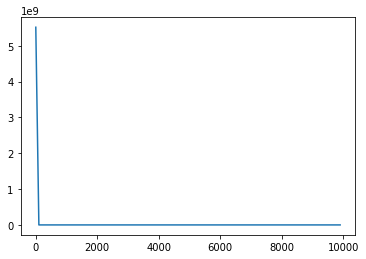

In [12]:
#[try] 中間層の活性化関数を変更してみよう
#ReLU(勾配爆発を確認しよう)
#tanh(numpyにtanhが用意されている。導関数をd_tanhとして作成しよう)

import numpy as np
from common import functions
import matplotlib.pyplot as plt

# def d_tanh(x):



# データを用意
# 2進数の桁数
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)
# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)],dtype=np.uint8).T,axis=1)

input_layer_size = 2
hidden_layer_size = 32
output_layer_size = 1

weight_init_std = 1
learning_rate = 0.1

iters_num = 10000
plot_interval = 100

# ウェイト初期化 (バイアスは簡単のため省略)
W_in = weight_init_std * np.random.randn(input_layer_size, hidden_layer_size)
W_out = weight_init_std * np.random.randn(hidden_layer_size, output_layer_size)
W = weight_init_std * np.random.randn(hidden_layer_size, hidden_layer_size)

# Xavier


# He



# 勾配
W_in_grad = np.zeros_like(W_in)
W_out_grad = np.zeros_like(W_out)
W_grad = np.zeros_like(W)

u = np.zeros((hidden_layer_size, binary_dim + 1))
z = np.zeros((hidden_layer_size, binary_dim + 1))
y = np.zeros((output_layer_size, binary_dim))

delta_out = np.zeros((output_layer_size, binary_dim))
delta = np.zeros((hidden_layer_size, binary_dim + 1))

all_losses = []

for i in range(iters_num):
    
    # A, B初期化 (a + b = d)
    a_int = np.random.randint(largest_number/2)
    a_bin = binary[a_int] # binary encoding
    b_int = np.random.randint(largest_number/2)
    b_bin = binary[b_int] # binary encoding
    
    # 正解データ
    d_int = a_int + b_int
    d_bin = binary[d_int]
    
    # 出力バイナリ
    out_bin = np.zeros_like(d_bin)
    
    # 時系列全体の誤差
    all_loss = 0    
    
    # 時系列ループ
    for t in range(binary_dim):
        # 入力値
        X = np.array([a_bin[ - t - 1], b_bin[ - t - 1]]).reshape(1, -1)
        # 時刻tにおける正解データ
        dd = np.array([d_bin[binary_dim - t - 1]])
        
        u[:,t+1] = np.dot(X, W_in) + np.dot(z[:,t].reshape(1, -1), W)
        z[:,t+1] = functions.relu(u[:,t+1])

        y[:,t] = functions.relu(np.dot(z[:,t+1].reshape(1, -1), W_out))


        #誤差
        loss = functions.mean_squared_error(dd, y[:,t])
        
        delta_out[:,t] = functions.d_mean_squared_error(dd, y[:,t]) * functions.d_relu(y[:,t])        
        
        all_loss += loss

        out_bin[binary_dim - t - 1] = np.round(y[:,t])
    
    
    for t in range(binary_dim)[::-1]:
        X = np.array([a_bin[-t-1],b_bin[-t-1]]).reshape(1, -1)        

        delta[:,t] = (np.dot(delta[:,t+1].T, W.T) + np.dot(delta_out[:,t].T, W_out.T)) * functions.d_relu(u[:,t+1])

        # 勾配更新
        W_out_grad += np.dot(z[:,t+1].reshape(-1,1), delta_out[:,t].reshape(-1,1))
        W_grad += np.dot(z[:,t].reshape(-1,1), delta[:,t].reshape(1,-1))
        W_in_grad += np.dot(X.T, delta[:,t].reshape(1,-1))
    
    # 勾配適用
    W_in -= learning_rate * W_in_grad
    W_out -= learning_rate * W_out_grad
    W -= learning_rate * W_grad
    
    W_in_grad *= 0
    W_out_grad *= 0
    W_grad *= 0
    

    if(i % plot_interval == 0):
        all_losses.append(all_loss)        
        print("iters:" + str(i))
        print("Loss:" + str(all_loss))
        print("Pred:" + str(out_bin))
        print("True:" + str(d_bin))
        out_int = 0
        for index,x in enumerate(reversed(out_bin)):
            out_int += x * pow(2, index)
        print(str(a_int) + " + " + str(b_int) + " = " + str(out_int))
        print("------------")

lists = range(0, iters_num, plot_interval)
plt.plot(lists, all_losses, label="loss")
plt.show()

#tanh(numpyにtanhが用意されている。導関数をd_tanhとして作成しよう)

中間層の活性化関数をtanhに変更し（かつHeの初期値を使用すると）かなり学習がスムーズに行われる。

iters:0
Loss:0.2190988033016282
Pred:[0 0 0 0 0 1 0 0]
True:[1 0 0 0 0 1 0 0]
10 + 122 = 4
------------
iters:100
Loss:0.7908142641178675
Pred:[1 1 1 1 1 0 1 1]
True:[0 1 1 1 1 0 1 1]
71 + 52 = 251
------------
iters:200
Loss:0.9899452491316725
Pred:[255   0   1   1   1   1   1   0]
True:[0 0 1 0 0 1 1 0]
26 + 12 = 32702
------------
iters:300
Loss:1.9319003959712298
Pred:[0 1 1 1 1 1 1 1]
True:[1 0 0 1 1 0 0 0]
57 + 95 = 127
------------
iters:400
Loss:1.190620154945363
Pred:[0 0 0 0 1 0 0 1]
True:[0 1 1 1 1 0 0 1]
59 + 62 = 9
------------
iters:500
Loss:0.32441574949623975
Pred:[0 1 1 0 1 1 0 1]
True:[0 1 1 0 0 1 0 1]
53 + 48 = 109
------------
iters:600
Loss:0.15147648035387035
Pred:[1 1 1 0 1 0 1 1]
True:[1 1 1 0 1 0 1 1]
109 + 126 = 235
------------
iters:700
Loss:0.14354302365589097
Pred:[1 0 0 1 0 1 1 1]
True:[1 0 0 1 0 1 1 1]
83 + 68 = 151
------------
iters:800
Loss:0.06185582753848629
Pred:[0 0 0 1 1 1 0 0]
True:[0 0 0 1 1 1 0 0]
21 + 7 = 28
------------
iters:900
Loss:0.0967

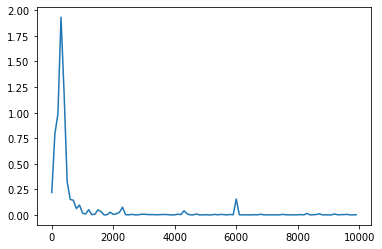

In [10]:
import numpy as np
from common import functions
import matplotlib.pyplot as plt

def d_tanh(x):
  sinh = (np.exp(x) - np.exp(-x)) / 2
  cosh = (np.exp(x) + np.exp(-x)) / 2
  return (cosh**2 - sinh**2) / cosh**2

# データを用意
# 2進数の桁数
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)
# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)],dtype=np.uint8).T,axis=1)

input_layer_size = 2
hidden_layer_size = 16
output_layer_size = 1

weight_init_std = 1
learning_rate = 0.1

iters_num = 10000
plot_interval = 100

# ウェイト初期化 (バイアスは簡単のため省略)
W_in = weight_init_std * np.random.randn(input_layer_size, hidden_layer_size)
W_out = weight_init_std * np.random.randn(hidden_layer_size, output_layer_size)
W = weight_init_std * np.random.randn(hidden_layer_size, hidden_layer_size)

# Xavier


# He
W_in = np.random.randn(input_layer_size, hidden_layer_size) / np.sqrt(input_layer_size) * np.sqrt(2)
W_out = np.random.randn(hidden_layer_size, output_layer_size) / np.sqrt(hidden_layer_size) * np.sqrt(2)
W = np.random.randn(hidden_layer_size, hidden_layer_size) / np.sqrt(hidden_layer_size) * np.sqrt(2)


# 勾配
W_in_grad = np.zeros_like(W_in)
W_out_grad = np.zeros_like(W_out)
W_grad = np.zeros_like(W)

u = np.zeros((hidden_layer_size, binary_dim + 1))
z = np.zeros((hidden_layer_size, binary_dim + 1))
y = np.zeros((output_layer_size, binary_dim))

delta_out = np.zeros((output_layer_size, binary_dim))
delta = np.zeros((hidden_layer_size, binary_dim + 1))

all_losses = []

for i in range(iters_num):
    
    # A, B初期化 (a + b = d)
    a_int = np.random.randint(largest_number/2)
    a_bin = binary[a_int] # binary encoding
    b_int = np.random.randint(largest_number/2)
    b_bin = binary[b_int] # binary encoding
    
    # 正解データ
    d_int = a_int + b_int
    d_bin = binary[d_int]
    
    # 出力バイナリ
    out_bin = np.zeros_like(d_bin)
    
    # 時系列全体の誤差
    all_loss = 0    
    
    # 時系列ループ
    for t in range(binary_dim):
        # 入力値
        X = np.array([a_bin[ - t - 1], b_bin[ - t - 1]]).reshape(1, -1)
        # 時刻tにおける正解データ
        dd = np.array([d_bin[binary_dim - t - 1]])
        
        u[:,t+1] = np.dot(X, W_in) + np.dot(z[:,t].reshape(1, -1), W)
        # z[:,t+1] = functions.sigmoid(u[:,t+1])
        z[:,t+1] = np.tanh(u[:,t+1])

        # y[:,t] = functions.sigmoid(np.dot(z[:,t+1].reshape(1, -1), W_out))
        y[:,t] = np.tanh(np.dot(z[:,t+1].reshape(1, -1), W_out))

        #誤差
        loss = functions.mean_squared_error(dd, y[:,t])
        
        # delta_out[:,t] = functions.d_mean_squared_error(dd, y[:,t]) * functions.d_sigmoid(y[:,t])        
        delta_out[:,t] = functions.d_mean_squared_error(dd, y[:,t]) * d_tanh(y[:,t])    

        all_loss += loss

        out_bin[binary_dim - t - 1] = np.round(y[:,t])
    
    
    for t in range(binary_dim)[::-1]:
        X = np.array([a_bin[-t-1],b_bin[-t-1]]).reshape(1, -1)        

        # delta[:,t] = (np.dot(delta[:,t+1].T, W.T) + np.dot(delta_out[:,t].T, W_out.T)) * functions.d_sigmoid(u[:,t+1])
        delta[:,t] = (np.dot(delta[:,t+1].T, W.T) + np.dot(delta_out[:,t].T, W_out.T)) * d_tanh(u[:,t+1])

        # 勾配更新
        W_out_grad += np.dot(z[:,t+1].reshape(-1,1), delta_out[:,t].reshape(-1,1))
        W_grad += np.dot(z[:,t].reshape(-1,1), delta[:,t].reshape(1,-1))
        W_in_grad += np.dot(X.T, delta[:,t].reshape(1,-1))
    
    # 勾配適用
    W_in -= learning_rate * W_in_grad
    W_out -= learning_rate * W_out_grad
    W -= learning_rate * W_grad
    
    W_in_grad *= 0
    W_out_grad *= 0
    W_grad *= 0
    

    if(i % plot_interval == 0):
        all_losses.append(all_loss)        
        print("iters:" + str(i))
        print("Loss:" + str(all_loss))
        print("Pred:" + str(out_bin))
        print("True:" + str(d_bin))
        out_int = 0
        for index,x in enumerate(reversed(out_bin)):
            out_int += x * pow(2, index)
        print(str(a_int) + " + " + str(b_int) + " = " + str(out_int))
        print("------------")

lists = range(0, iters_num, plot_interval)
plt.plot(lists, all_losses, label="loss")
plt.show()


2000回で十分。